In [1]:
### -----------------------------------------------------------------------------------------------------------###
#                                                                                                                #
#                                     Please Read All the comments ⊂(◉‿◉)                                        #
#                                                                                                                #
###------------------------------------------------------------------------------------------------------------###

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm

In [3]:
### -----------------------------------------------------------------------------------------------------------###
#                                     Perfect Binary Data & Linear Kernel                                        #
###------------------------------------------------------------------------------------------------------------###

In [4]:
# draw two random groups of points for us to separate later using a svm
x = np.random.normal(loc=0, scale=0.5, size=(100, 2))
y = np.random.normal(loc=2, scale=0.5, size=(100, 2))

# to see format of the data uncomment line below
# print(x[:10],'\n\n',y[:10])

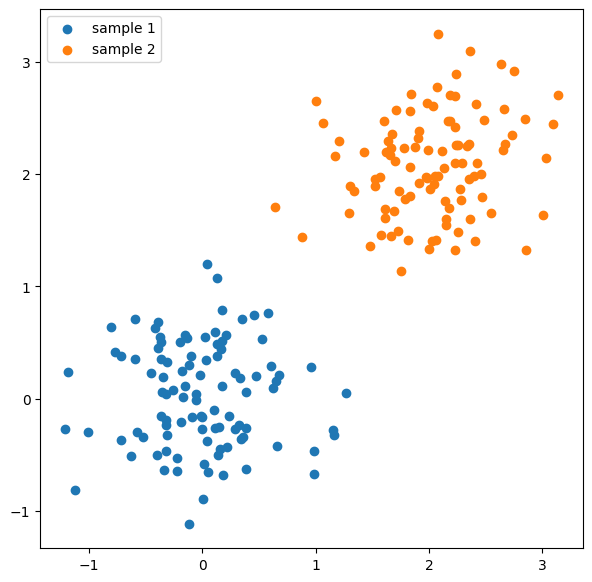

In [5]:
# draw a scatter plot of the x,y and x_test,y_test
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot()

ax.scatter(x[:,0],x[:,1],label='sample 1')
ax.scatter(y[:,0],y[:,1],label='sample 2')
# ax.scatter(np.sort(x_test),y_test,label='testing data')
plt.legend()

In [6]:
# Combine the two groups into a single dataset
X = np.concatenate((x, y), axis=0)
y = np.concatenate((np.zeros(100), np.ones(100)))

In [7]:
# Create a SVM with a linear kernel and fit the data
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)

SVC(C=1000, kernel='linear')

In [8]:
# Determine the limits of the plot
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

In [9]:
# Create a grid of points to plot the decision boundary
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

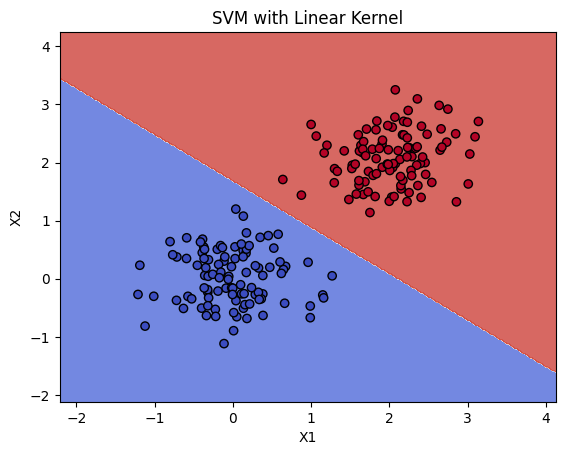

In [10]:
# Plot the decision boundary and the points
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title('SVM with Linear Kernel')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [11]:
### -----------------------------------------------------------------------------------------------------------###
#                               Hard to sepatate binary Cluster Classification Data                              #
###------------------------------------------------------------------------------------------------------------###

In [12]:
# Define the parameters of the donut shape
r1 = 2.5  # Radius of the inner circle
r2 = 5.0  # Radius of the outer circle
n = 500  # Number of points to generate

In [13]:
# Generate random polar coordinates for the points
theta = np.random.uniform(0, 2*np.pi, n)
r = np.sqrt(np.random.uniform(r1**2, r2**2, n))

In [14]:
# Convert polar coordinates to Cartesian coordinates
x = r * np.cos(theta)
y = r * np.sin(theta)

In [15]:
# Create a second group of points inside the donut
r_inner = 1.5  # Radius of the inner circle for the second group
theta_inner = np.random.uniform(0, 2*np.pi, n)
r2_inner = np.sqrt(np.random.uniform(0, r_inner**2, n))
x_inner = r2_inner * np.cos(theta_inner)
y_inner = r2_inner * np.sin(theta_inner)

In [16]:
# Combine the two groups into a single dataset
X = np.concatenate((np.column_stack((x, y)), np.column_stack((x_inner, y_inner))))
y = np.concatenate((np.zeros(n), np.ones(n)))

In [17]:
# Last excercise was a nice demostration but that is not really where SVMs shine. 
# SVMs compared to other classifiers have an advatage in a form of a kernel.
# This kernel allows them to classify data in higher dimensions than the data is currently in. 
# Eg. look at this data. This would be impossible to separate using a line in 2d if not for SVMs.

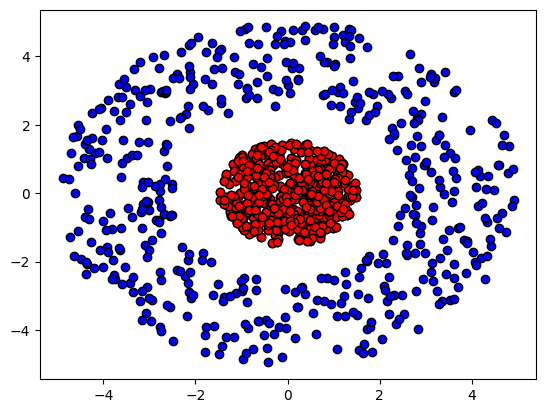

In [18]:
plt.scatter(X[:,0], X[:,1], c='b', edgecolors='k', label='Outside Donut')
plt.scatter(x_inner, y_inner, c='r', edgecolors='k', label='Inside Donut')
plt.show()

In [19]:
# Create a SVM with a linear kernel and fit the data
clf = svm.SVC(kernel='rbf',degree=3)
clf.fit(X,y)

SVC()

In [20]:
# But using a non linear kernel that can seperate data in higher dimension we are able to split those two groups using a plane in 3d

In [21]:
# Determine the limits of the plot
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

In [22]:
# Plot the decision boundary and the points
xx, yy = np.meshgrid(np.arange(min(X[:,0]), max(X[:,0]), 0.02), np.arange(min(X[:,1]), max(X[:,1]), 0.02))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

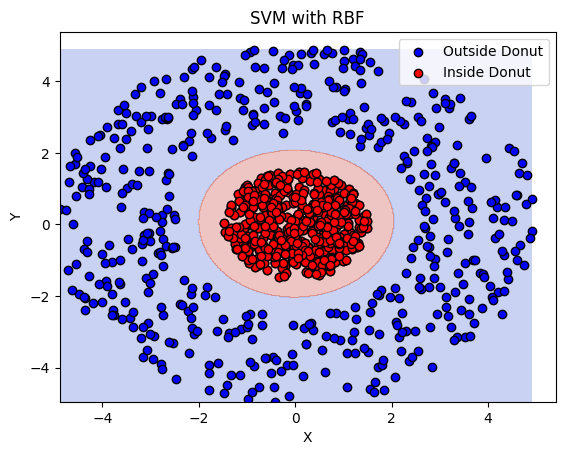

In [23]:
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
plt.scatter(X[:,0], X[:,1], c='b', edgecolors='k', label='Outside Donut')
plt.scatter(x_inner, y_inner, c='r', edgecolors='k', label='Inside Donut')
plt.legend()
plt.title('SVM with RBF')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [24]:
# To better ilustrate what is happening let me demonstrate what might be happening in 3d.

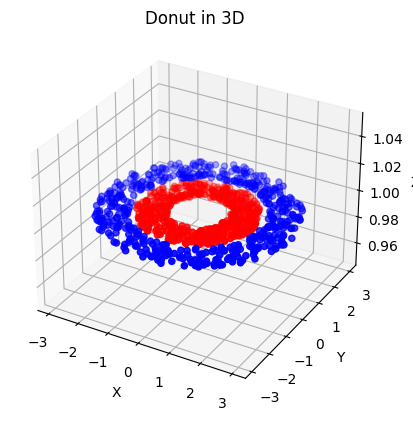

In [25]:
from mpl_toolkits.mplot3d import Axes3D
# Define the parameters of the donut shape
r1 = 1  # Radius of the inner circle
r2 = 2  # Radius of the outer circle
r3 = 0.9
r4 = 0
n = 500  # Number of points to generate

# Generate random polar coordinates for the points
theta = np.random.uniform(0, 2*np.pi, n)
phi = np.random.uniform(0, 2*np.pi, n)
r = np.random.uniform(r1, r2, n)

# Convert polar coordinates to Cartesian coordinates
x = (r + r1) * np.cos(theta)
y = (r + r1) * np.sin(theta)
z = np.random.uniform(1,1, n)

r = np.random.uniform(r3, r4, n)
a = (r + r3) * np.cos(theta)
b = (r + r3) * np.sin(theta)

# Plot the donut in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='b')
ax.scatter(a, b, z, c='r')
ax.set_title('Donut in 3D')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [26]:
# Here we have our points represented in a 3d space.
# The kernel of a SVM essentialy modifies the data in a new axis in this example in z.
# An example transformation would look like this.

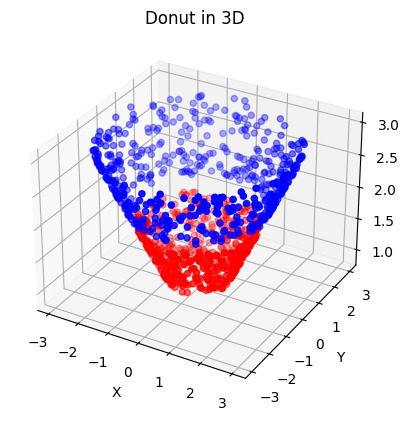

In [27]:
# Plot the donut in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, np.sqrt(x**2+y**2), c='b')
ax.scatter(a, b, np.sqrt(a**2+b**2), c='r')
ax.set_title('Donut in 3D')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [28]:
# Since our donut trasformed into a cone and the colors are well separated we can split them using a plane and then project the outcome onto a 2d plane.

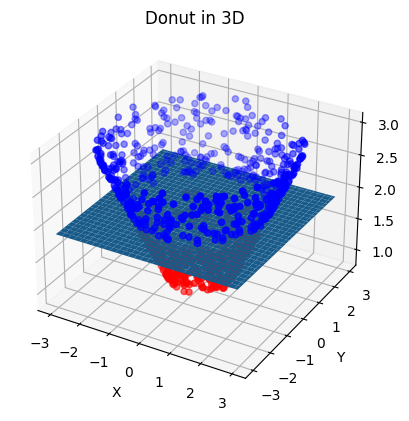

In [40]:
# Define the x and y ranges of the plane
plane_x = np.arange(-3, 3, 0.1)
plane_y = np.arange(-3, 3, 0.1)

# Create a meshgrid of x and y coordinates
X, Y = np.meshgrid(plane_x, plane_y)

# Set the z coordinate of each point to 0
Z = np.zeros_like(X)+1.9

# Plot the donut in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, np.sqrt(x**2+y**2), c='b')
ax.scatter(a, b, np.sqrt(a**2+b**2), c='r')
ax.plot_surface(X, Y, Z)
ax.set_title('Donut in 3D')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

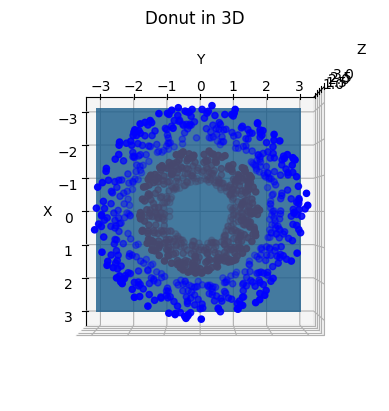

In [41]:

# Define the x and y ranges of the plane
plane_x = np.arange(-3, 3, 0.1)
plane_y = np.arange(-3, 3, 0.1)

# Create a meshgrid of x and y coordinates
X, Y = np.meshgrid(plane_x, plane_y)

# Set the z coordinate of each point to 0
Z = np.zeros_like(X)+1.9

# Plot the donut in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, np.sqrt(x**2+y**2), c='b')
ax.scatter(a, b, np.sqrt(a**2+b**2), c='r')
ax.plot_surface(X, Y, Z,alpha=0.8)
ax.set_title('Donut in 3D')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(elev=90, azim=0)
plt.show()